In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.

In [85]:
fifa17 <- read.csv("../input/complete-fifa-2017-player-dataset-global/FullData.csv")
fifa18 <- read.csv("../input/fifa-18-more-complete-player-dataset/complete.csv")

## Let's explore some sample data from both fifa17 and fifa18

In [86]:
head(fifa17)

Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,⋯,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
Cristiano Ronaldo,Portugal,LS,7,Real Madrid,LW,7,07/01/2009,2021,94,⋯,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,RW,10,FC Barcelona,RW,10,07/01/2004,2018,93,⋯,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,LW,10,FC Barcelona,LW,11,07/01/2013,2021,92,⋯,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,LS,9,FC Barcelona,ST,9,07/11/2014,2021,92,⋯,86,86,84,85,88,33,27,31,25,37
Manuel Neuer,Germany,GK,1,FC Bayern,GK,1,07/01/2011,2021,92,⋯,16,14,11,47,11,91,89,95,90,89
De Gea,Spain,GK,1,Manchester Utd,GK,1,07/01/2011,2019,90,⋯,12,21,19,40,13,86,88,87,85,90


In [87]:
head(fifa18)

ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,⋯,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185,⋯,False,False,False,False,False,False,False,False,False,False
158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170,⋯,False,False,False,False,False,False,False,False,False,False
190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175,⋯,False,False,False,False,False,False,False,False,False,False
176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182,⋯,False,False,False,False,False,False,False,False,False,False
167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193,⋯,False,False,False,False,False,False,False,False,False,True
188545,R. Lewandowski,Robert Lewandowski,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,2146,28,German Bundesliga,1988-08-21,185,⋯,False,False,False,False,False,False,False,False,False,False


In [5]:
df <- merge(fifa17, fifa18, by.x = "Name", by.y = "name")

In [6]:
print(nrow(fifa17))
print(nrow(fifa18))
print(nrow(df))

[1] 17588
[1] 17994
[1] 2392


## Why so much reduce in number of shared player

- A lot of player can't be join because the difference of how their name are written between two dataset. e.g. Lionel Messi vs L. Messi
- We can clean the data more to join more players, but for the sake of simplicity we will just leave it for now. 

In [7]:
head(df)

Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,⋯,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
Aarón,Spain,,NA,Málaga CF,Res,27,12/08/2013,2017,62,⋯,False,False,False,False,False,False,False,False,False,True
Aarón Martín,Spain,,NA,RCD Espanyol,LB,12,07/01/2015,2022,73,⋯,False,True,False,False,False,False,False,False,False,False
Aarón Ñíguez,Spain,,NA,CD Tenerife,LM,17,08/30/2016,2017,71,⋯,False,False,False,False,False,False,False,False,False,False
Abraham,Spain,,NA,Levante UD,Sub,22,06/01/2011,2018,71,⋯,False,False,False,False,False,False,False,False,False,False
Abraham,Spain,,NA,Levante UD,Sub,22,06/01/2011,2018,71,⋯,False,True,False,False,False,False,False,False,False,False
Abraham,Spain,,NA,U.N.A.M.,RCM,10,07/01/2016,2022,76,⋯,False,False,False,False,False,False,False,False,False,False


## Too much data too follow
 Let's pick just some value to compare. We will use the foollows:
- Overall
- Some shared stats each player have (Dribbling)
- Height and Weight 

## Player overall Rating over two years.

- The red line indicate the line that  theplayer has the same rating in both fifa 17 and 18. (No improvement)
- The player above the red line is the one that get higher rating.
- The player below the red line has lower rating.

This is a potentially interesting question. One might divedeeper to find out what factors can cause the lower or higher in rating. One assumption is the age. Younger player imght have more room for improvement. 

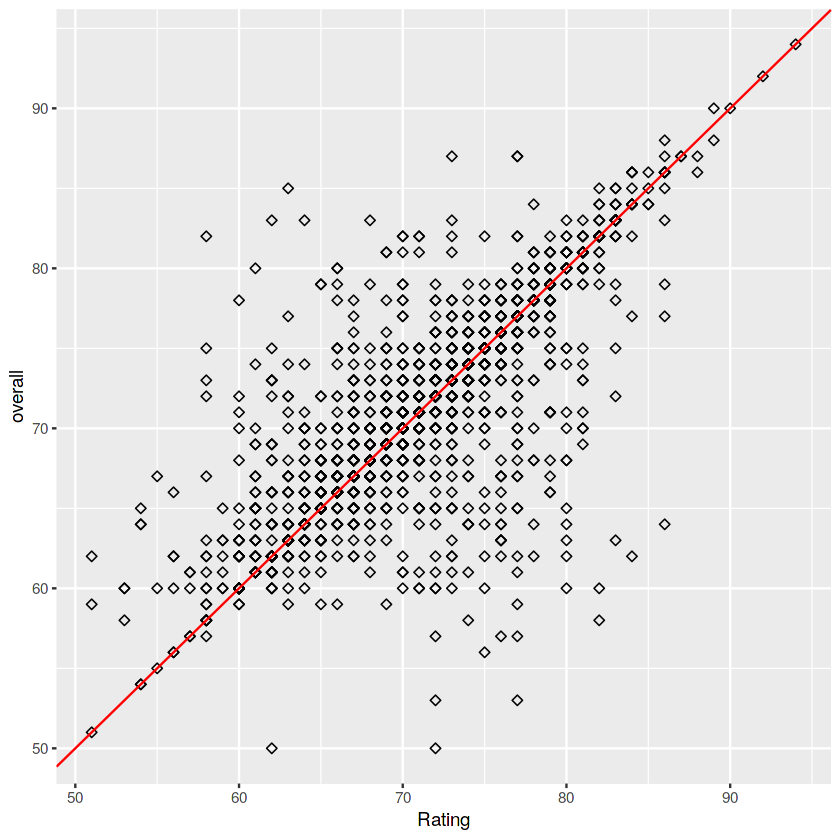

In [42]:
# Plot of overall rating of player
ggplot(df, aes(x=Rating, y=overall)) +
  geom_point(size=2, shape=23) +  
    geom_abline(slope=1, intercept=0, colour= 'red')

## Player main stats.

- In fifa, players have main status that indicate the style of player and how good they are at things. We wlil look at only Pace (pac) and see the difference.
- From the result, you can see that mots playerdribbling skill is usually in around the range of 50-100.
- We can also find many large change in dribbling skill, either around 25 -> 75 or vice versa. 

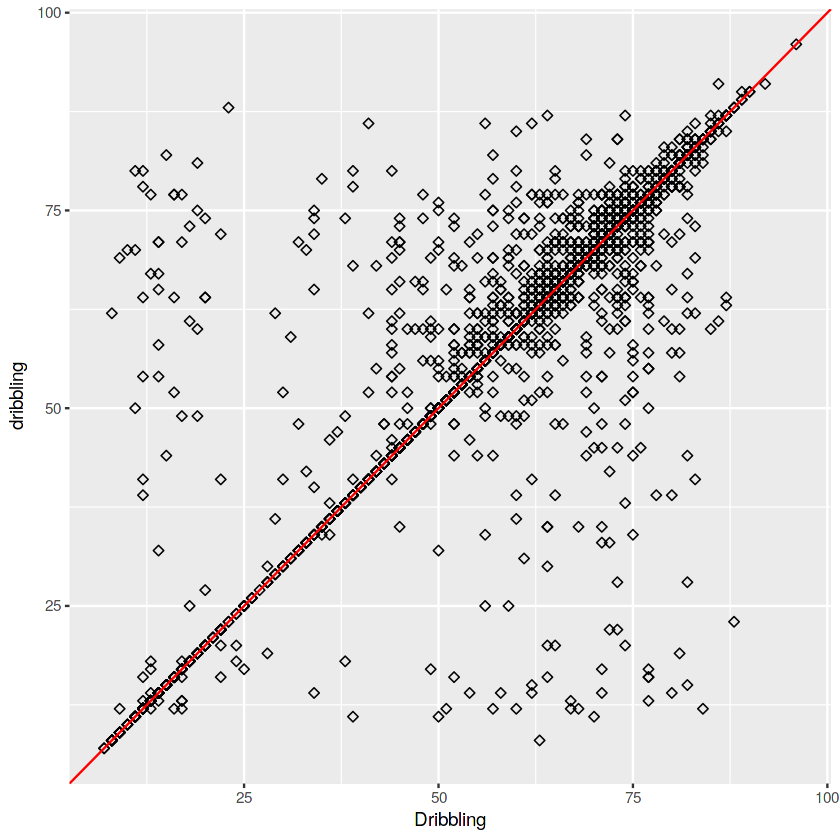

In [84]:
# Plot of overall rating of player
ggplot(df, aes(x=Dribbling, y=dribbling)) +
  geom_point(size=2, shape=23) +  
    geom_abline(slope=1, intercept=0, colour= 'red')

## Weight and Height

- Now let's see if the height and weight of the players remain the same in one year. Our assumption is there shouldn't be that much change in height, but the weight might have some different because weight is more changable that the height.

In [66]:
cmString2Int <- function(cmString){
return(as.numeric(gsub('\\cm', '', cmString)))
}
kgString2Int <- function(cmString){
return(as.numeric(gsub('\\kg', '', cmString)))
}


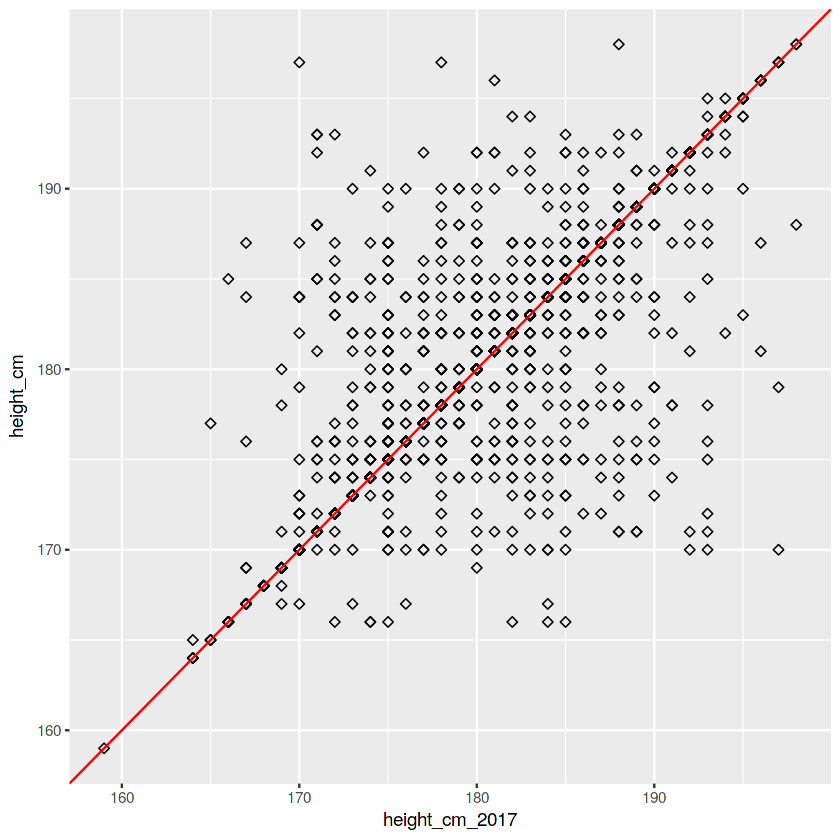

In [68]:
# Plot of overall rating of player
height_cm_2017 = apply(df["Height"],1,cmString2Int)

ggplot(df, aes(x=height_cm_2017, y=height_cm)) +
  geom_point(size=2, shape=23) +  
    geom_abline(slope=1, intercept=0, colour= 'red')

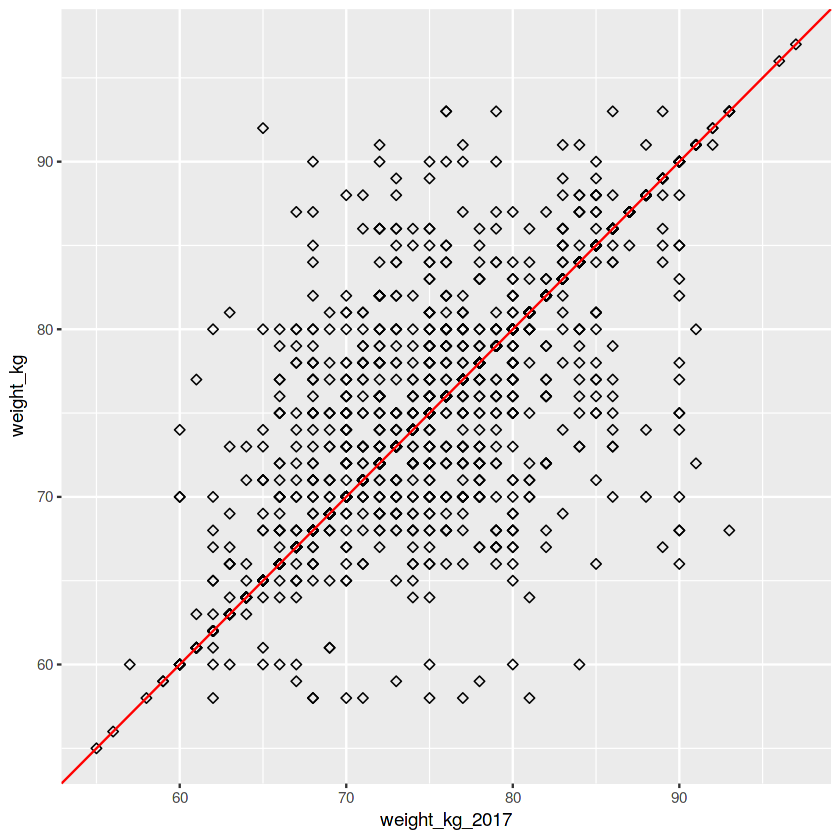

In [69]:
# Plot of overall rating of player
weight_kg_2017 = apply(df["Weight"],1,kgString2Int)

ggplot(df, aes(x=weight_kg_2017, y=weight_kg)) +
  geom_point(size=2, shape=23) +  
    geom_abline(slope=1, intercept=0, colour= 'red')

To our surprise, there are a lot of change in both the height and weight. Let's see if change in height actually affect the change in weight. Our another assumption is if player have change in height, they should also have some change in weight.

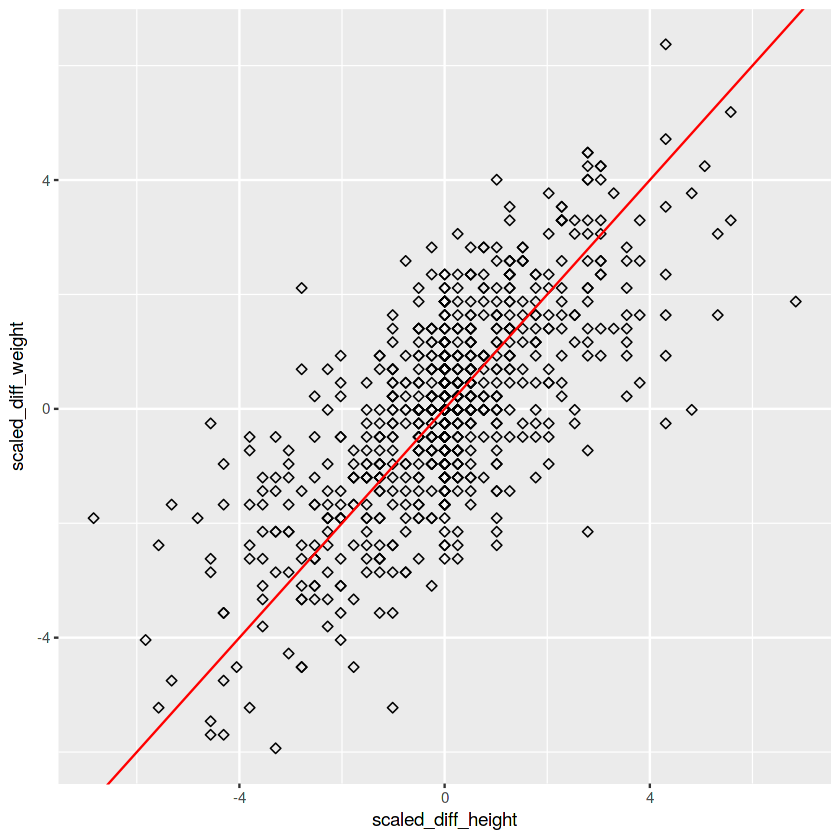

In [83]:
df["scaled_diff_height"] = c(scale(df["height_cm"] - height_cm_2017))
df["scaled_diff_weight"] = c(scale(df["weight_kg"] - weight_kg_2017))

ggplot(df,aes(x=scaled_diff_height, y=scaled_diff_weight)) +
  geom_point(size=2, shape=23) +  
    geom_abline(slope=1, intercept=0, colour= 'red')

## From this scatterplot, we learn that..
- Two two variable have some correlation as expected. If one were to be taller, that person should also be heavier. 
- There are not so many cases where player are taller but lighter.